# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Jonatas Duarte Souza

#### RA

11036516

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

O dataset escolhido foi o _Boston house prices dataset_ , que consiste no valor de várias casas da cidade de Boston, tendo no total 13 _features_ para cada exemplo.

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
x = boston.data
y = boston.target

Os métodos de redução de dimensionalidade escolhidos foram: PCA, FastICA e TSNE. Esses métodos foram utilizados com os modelos de regressão Lasso, Ridge e Random Sample Consensus (RANSAC), respectivamente.

In [3]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold      import TSNE

In [4]:
from sklearn.linear_model import Lasso, Ridge, RANSACRegressor
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Para a análise dos resultados, foram utilizadas as métricas Mean Squared Error (MSE) e o Coeficiente de Determinação (R²)

In [5]:
def plot(x, y, x_test, y_pred):
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, 'r')

def print_metrics(y_test, y_pred):
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("R2 :", r2_score(y_test, y_pred))

def test_model(x_ori, y, model, reddim):
    x = reddim.fit_transform(x_ori)
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print_metrics(y_test, y_pred)
    
    plot(x, y, x_test, y_pred)

MSE:  79.71322743669629
R2 : 0.2199535243216405


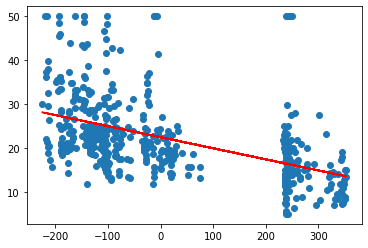

In [6]:
test_model(x, y, Lasso(), PCA(1))

MSE:  83.2692460190206
R2 : 0.14535135162121537


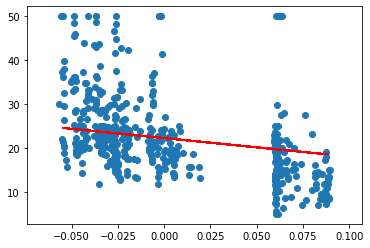

In [7]:
test_model(x, y, Ridge(), FastICA(1))

MSE:  97.17409015854257
R2 : -0.002353084207647127


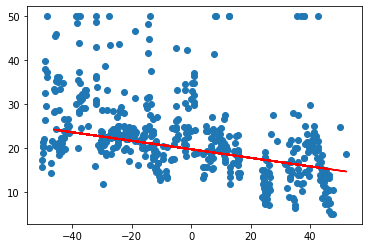

In [8]:
test_model(x, y, RANSACRegressor(), TSNE(1))

Dentre os modelos utilizados, o que teve o melhor resultado foi o Lasso, pois teve o menor MSE, significando que os valores preditos estão, em média, mais próximos dos valores reais nesse modelo do que nos outros modelos. Além disso, também teve o valor de R² mais alto, significando que foi o modelo que mais se adequou aos dados. O modelo Ridge teve um desempenho um pouco pior, porém obteve um resultado próximo ao do Lasso. O RANSAC teve o pior desempenho, tendo o coeficiente de determinação R² negativo, significando que teve um resultado pior do que um modelo constante, que sempre prediz o mesmo resultado.

## Referências

https://scikit-learn.org/stable/datasets/index.html#datasets \
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html \
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
